# US Employment Heatmap

This notebook takes Census data on employment by state in 2015, then heatmaps it onto a US map.
It uses geopandas, as well as pandas and matplotlib.
In order to run, first pip install geopandas, then the descartes package.

In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt

# note: will need to pip install geopandas and descartes

# define path for source csv file
source_file_2015 = 'Resources/employment/ACS_15_5YR_S2301_with_ann.csv'

# path for map shapefile
fp = 'Resources/states_21basic/states.shp'

### Read in shapefile as geopandas geodataframe.

In [2]:
# read in shapefile for us map, confirm its type

map_df= gpd.read_file(fp)
type(map_df)

geopandas.geodataframe.GeoDataFrame

Remove Alaska & Hawaii from geoframe so as to only show continental US.

In [3]:
# print # of rows
print(f'Rows before dropping Alaska & Hawaii:  {map_df.STATE_NAME.count()}')

# drop Alaska and Hawaii
map_df = map_df.drop(index=0)
map_df = map_df.drop(index=50)

# print # of rows
print(f'Rows after dropping Alaska & Hawaii:  {map_df.STATE_NAME.count()}')

Rows before dropping Alaska & Hawaii:  51
Rows after dropping Alaska & Hawaii:  49


In [4]:
# print head
map_df.head(2)

,STATE_NAME,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry
1,Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...
2,Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...


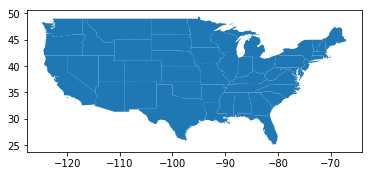

In [5]:
# preview map file
map_df.plot()

### Read and clean employment data.

In [6]:
# read csv file into dataframe
data_2015 = pd.read_csv(source_file_2015)

In [7]:
# choose the two columns to keep
data_2015 = data_2015[['GEO.display-label','HC02_EST_VC01']]

# drop gratuitious header line
data_2015 = data_2015.drop(data_2015.index[0])

# rename columns 
data_2015.columns = ['State', 'Employment']

# show sample of final dataframe
data_2015.head(2)


,State,Employment
1,Alabama,58.3
2,Alaska,70.6


### Combine pandas dataframe with employment data and map geodataframe to create new geodataframe.

In [8]:
# create geodataframe with map data + employment data
merged = map_df.set_index('STATE_NAME').join(data_2015.set_index('State'))
merged.head(2)

,DRAWSEQ,STATE_FIPS,SUB_REGION,STATE_ABBR,geometry,Employment
STATE_NAME,,,,,,
Washington,2,53,Pacific,WA,(POLYGON ((-122.4020153103835 48.2252163723779...,64.4
Montana,3,30,Mountain,MT,POLYGON ((-111.4754253002074 44.70216236909688...,64.0


### Create map.

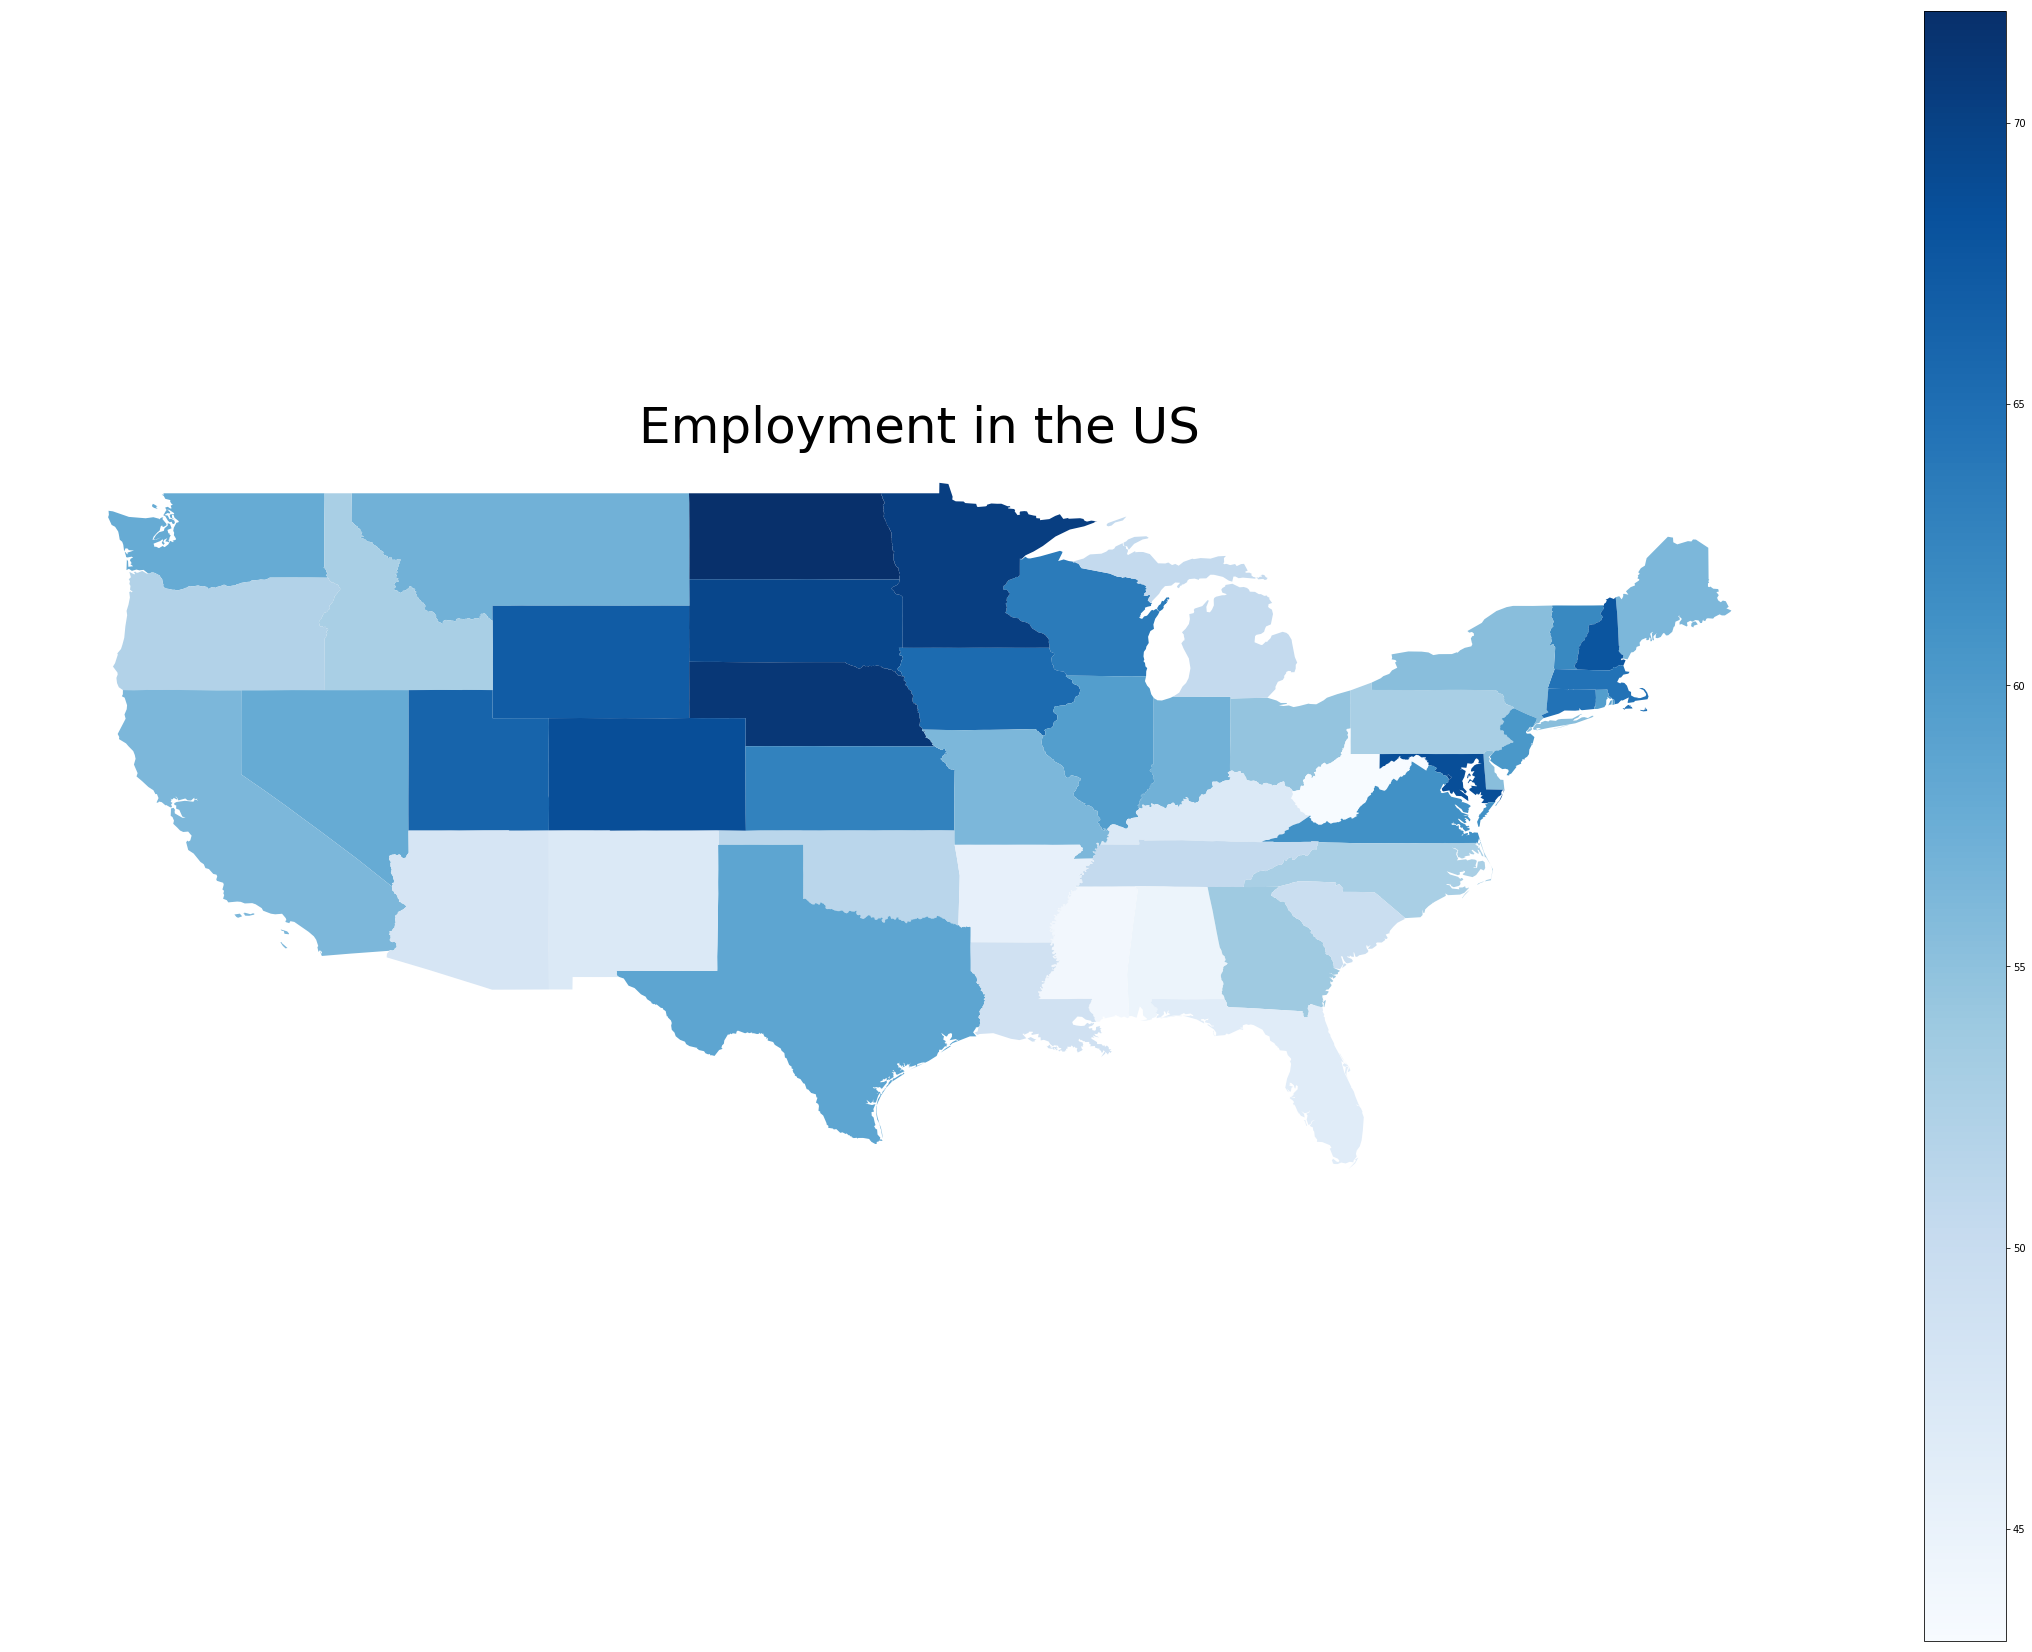

In [9]:
# set a variable to call column to visualize
variable = 'Employment'

# set range for choropleth
# note: this is based on min & max from data values
vmin, vmax=43, 72

# create figure & axes for matplotlib
fig, ax = plt.subplots(1, figsize=(40,30))

# remove axis
ax.axis('off')

# add title
ax.set_title('Employment in the US', fontdict={'fontsize': '50', 'fontweight': '3'})

# create colorbar as legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# empty array for the data range
sm._A = []

# add colorbar to figure

cbar = fig.colorbar(sm)

# plot it!

merged.plot(column=variable, ax=ax, cmap='Blues')